In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initial Exploration and Cleaning

In [2]:
df = pd.read_csv('final.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,id,name,year,run_time,genre,rating,about,director,actors,votes,gross
0,0,0,1,The Shawshank Redemption,1994,142 min,Drama,9.3,"imprisoned men bond over a number of years, fi...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2451775,$28.34M
1,1,1,2,The Godfather,1972,175 min,"Crime, Drama",9.2,rganized crime dynasty's aging patriarch trans...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1696937,$134.97M
2,2,2,3,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,the menace known as the Joker wreaks havoc an...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2407467,$534.86M
3,3,3,4,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,early life and career of Vito Corleone in 1920...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1178645,$57.30M
4,4,4,5,Pulp Fiction,1994,154 min,"Crime, Drama",8.9,"lives of two mob hitmen, a boxer, a gangster a...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",1900380,$107.93M


In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'name', 'year', 'run_time', 'genre',
       'rating', 'about', 'director', 'actors', 'votes', 'gross'],
      dtype='object')

In [4]:
df_clean = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
df_clean.head()

,id,name,year,run_time,genre,rating,about,director,actors,votes,gross
0,1,The Shawshank Redemption,1994,142 min,Drama,9.3,"imprisoned men bond over a number of years, fi...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2451775,$28.34M
1,2,The Godfather,1972,175 min,"Crime, Drama",9.2,rganized crime dynasty's aging patriarch trans...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1696937,$134.97M
2,3,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,the menace known as the Joker wreaks havoc an...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2407467,$534.86M
3,4,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,early life and career of Vito Corleone in 1920...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1178645,$57.30M
4,5,Pulp Fiction,1994,154 min,"Crime, Drama",8.9,"lives of two mob hitmen, a boxer, a gangster a...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",1900380,$107.93M


In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1359 non-null   int64  
 1   name      1359 non-null   object 
 2   year      1359 non-null   object 
 3   run_time  1359 non-null   object 
 4   genre     1359 non-null   object 
 5   rating    1359 non-null   float64
 6   about     1359 non-null   object 
 7   director  1257 non-null   object 
 8   actors    1359 non-null   object 
 9   votes     1359 non-null   int64  
 10  gross     944 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 116.9+ KB


numerical columns:

- year -> int
- run_time -> int -> change to runtime_minutes
- rating -> float (DONE)
- votes -> int (DONE)
- gross -> float -> change to gross_millions

In [6]:
# non integer characters
df_clean = df_clean[df_clean['year'] != 'I) (']
df_clean = df_clean[df_clean['year'] != 'II) ']

In [7]:
df_clean['year'] = df_clean['year'].astype(np.int64)

In [8]:
df_clean['run_time'] = df_clean['run_time'].map(lambda x: x.rstrip('min'))
df_clean

,id,name,year,run_time,genre,rating,about,director,actors,votes,gross
0,1,The Shawshank Redemption,1994,142,Drama,9.3,"imprisoned men bond over a number of years, fi...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2451775,$28.34M
1,2,The Godfather,1972,175,"Crime, Drama",9.2,rganized crime dynasty's aging patriarch trans...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1696937,$134.97M
2,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,the menace known as the Joker wreaks havoc an...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2407467,$534.86M
3,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,early life and career of Vito Corleone in 1920...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1178645,$57.30M
4,5,Pulp Fiction,1994,154,"Crime, Drama",8.9,"lives of two mob hitmen, a boxer, a gangster a...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",1900380,$107.93M
...,...,...,...,...,...,...,...,...,...,...,...
1354,196,Ruby Sparks,2012,104,"Comedy, Drama, Fantasy",7.2,velist struggling with writer's block finds ro...,"Jonathan Dayton, Valerie Faris","Paul Dano, Zoe Kazan, Annette Bening, Antonio ...",98057,$2.54M
1355,197,Forgetting Sarah Marshall,2008,111,"Comedy, Drama, Romance",7.1,stated Peter takes a Hawaiian vacation in orde...,Nicholas Stoller,"Kristen Bell, Jason Segel, Paul Rudd, Mila Kunis",272993,$63.17M
1356,198,A Walk to Remember,2002,101,"Drama, Romance",7.3,"story of two North Carolina teens, Landon Cart...",Adam Shankman,"Mandy Moore, Shane West, Peter Coyote, Daryl H...",204304,$41.23M
1357,199,Café Society,2016,96,"Comedy, Drama, Romance",6.6,"he 1930s, a Bronx native moves to Hollywood an...",Woody Allen,"Jesse Eisenberg, Kristen Stewart, Steve Carell...",73899,$11.10M


In [9]:
df_clean['run_time'] = df_clean['run_time'].astype(np.int64)

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1358
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1299 non-null   int64  
 1   name      1299 non-null   object 
 2   year      1299 non-null   int64  
 3   run_time  1299 non-null   int64  
 4   genre     1299 non-null   object 
 5   rating    1299 non-null   float64
 6   about     1299 non-null   object 
 7   director  1197 non-null   object 
 8   actors    1299 non-null   object 
 9   votes     1299 non-null   int64  
 10  gross     892 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 121.8+ KB


In [11]:
np.sum(df_clean['gross'].isnull())

407

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
new_col = []
for row in df_clean['gross']:
    if pd.notnull(row):
        new_col.append(row.lstrip('$').rstrip('M'))
    else:
        new_col.append(np.nan)

In [14]:
clean_col = []
for num in new_col:
    if pd.notnull(num):
        clean_col.append(float(num))
    else:
        clean_col.append(np.nan)

In [15]:
len(clean_col)

1299

In [16]:
df_clean['gross'] = clean_col

In [17]:
df_clean

,id,name,year,run_time,genre,rating,about,director,actors,votes,gross
0,1,The Shawshank Redemption,1994,142,Drama,9.3,"imprisoned men bond over a number of years, fi...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2451775,28.34
1,2,The Godfather,1972,175,"Crime, Drama",9.2,rganized crime dynasty's aging patriarch trans...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1696937,134.97
2,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,the menace known as the Joker wreaks havoc an...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2407467,534.86
3,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,early life and career of Vito Corleone in 1920...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1178645,57.30
4,5,Pulp Fiction,1994,154,"Crime, Drama",8.9,"lives of two mob hitmen, a boxer, a gangster a...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",1900380,107.93
...,...,...,...,...,...,...,...,...,...,...,...
1354,196,Ruby Sparks,2012,104,"Comedy, Drama, Fantasy",7.2,velist struggling with writer's block finds ro...,"Jonathan Dayton, Valerie Faris","Paul Dano, Zoe Kazan, Annette Bening, Antonio ...",98057,2.54
1355,197,Forgetting Sarah Marshall,2008,111,"Comedy, Drama, Romance",7.1,stated Peter takes a Hawaiian vacation in orde...,Nicholas Stoller,"Kristen Bell, Jason Segel, Paul Rudd, Mila Kunis",272993,63.17
1356,198,A Walk to Remember,2002,101,"Drama, Romance",7.3,"story of two North Carolina teens, Landon Cart...",Adam Shankman,"Mandy Moore, Shane West, Peter Coyote, Daryl H...",204304,41.23
1357,199,Café Society,2016,96,"Comedy, Drama, Romance",6.6,"he 1930s, a Bronx native moves to Hollywood an...",Woody Allen,"Jesse Eisenberg, Kristen Stewart, Steve Carell...",73899,11.10


In [18]:
type(df_clean['gross'])

pandas.core.series.Series

In [19]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(df_clean['gross'].values.reshape(-1, 1))

SimpleImputer(strategy='median')

In [20]:
df_clean['gross'] = imp_mean.transform(df_clean['gross'].values.reshape(-1, 1))

In [21]:
np.sum(df_clean['gross'].isnull())

0

In [22]:
# name change
df_clean.rename(columns={
    'run_time': 'run_time_mins', 'gross': 'gross_millions'
}, inplace=True)

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1358
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1299 non-null   int64  
 1   name            1299 non-null   object 
 2   year            1299 non-null   int64  
 3   run_time_mins   1299 non-null   int64  
 4   genre           1299 non-null   object 
 5   rating          1299 non-null   float64
 6   about           1299 non-null   object 
 7   director        1197 non-null   object 
 8   actors          1299 non-null   object 
 9   votes           1299 non-null   int64  
 10  gross_millions  1299 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 121.8+ KB


In [24]:
np.sum(df['director'].isnull())

102

In [25]:
df_clean = df_clean.dropna()

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1358
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1197 non-null   int64  
 1   name            1197 non-null   object 
 2   year            1197 non-null   int64  
 3   run_time_mins   1197 non-null   int64  
 4   genre           1197 non-null   object 
 5   rating          1197 non-null   float64
 6   about           1197 non-null   object 
 7   director        1197 non-null   object 
 8   actors          1197 non-null   object 
 9   votes           1197 non-null   int64  
 10  gross_millions  1197 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 112.2+ KB


In [85]:
df_clean = df_clean.drop_duplicates(subset=df_clean.columns)

In [86]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1358
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1197 non-null   int64  
 1   name            1197 non-null   object 
 2   year            1197 non-null   int64  
 3   run_time_mins   1197 non-null   int64  
 4   genre           1197 non-null   object 
 5   rating          1197 non-null   float64
 6   about           1197 non-null   object 
 7   director        1197 non-null   object 
 8   actors          1197 non-null   object 
 9   votes           1197 non-null   int64  
 10  gross_millions  1197 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 112.2+ KB


# EDA Proper

In [124]:
df_clean = pd.read_csv('movies_imdb_clean.csv')

In [125]:
df_clean.head()

,Unnamed: 0,id,name,year,run_time_mins,genre,rating,about,director,actors,votes,gross_millions
0,0,1,The Shawshank Redemption,1994,142,Drama,9.3,"imprisoned men bond over a number of years, fi...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2451775,28.34
1,1,2,The Godfather,1972,175,"Crime, Drama",9.2,rganized crime dynasty's aging patriarch trans...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1696937,134.97
2,2,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,the menace known as the Joker wreaks havoc an...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2407467,534.86
3,3,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,early life and career of Vito Corleone in 1920...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1178645,57.30
4,4,5,Pulp Fiction,1994,154,"Crime, Drama",8.9,"lives of two mob hitmen, a boxer, a gangster a...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",1900380,107.93


In [126]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1060 non-null   int64  
 1   id              1060 non-null   int64  
 2   name            1060 non-null   object 
 3   year            1060 non-null   int64  
 4   run_time_mins   1060 non-null   int64  
 5   genre           1060 non-null   object 
 6   rating          1060 non-null   float64
 7   about           1060 non-null   object 
 8   director        1060 non-null   object 
 9   actors          1060 non-null   object 
 10  votes           1060 non-null   int64  
 11  gross_millions  1060 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 99.5+ KB


# Pearson Correlational Heatmap

<AxesSubplot:>

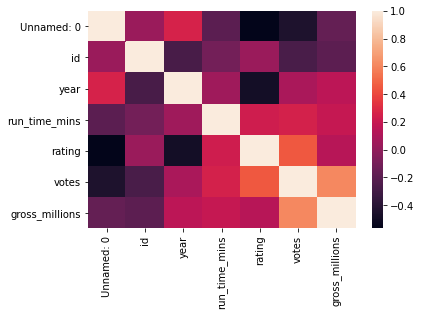

In [127]:
sns.heatmap(df_clean.corr())

The gross feature which is how much a movie made when it was released is highly correlated with:

- votes
- rating
- runtime
- year

This implies that gross income has a strong linear correlation with these features which is a very good indicator of revenue generators.

# Distribution of Gross

<AxesSubplot:>

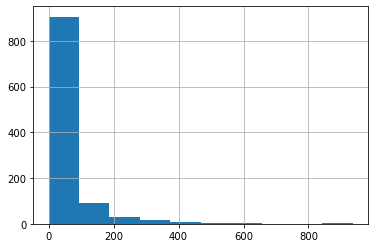

In [128]:
df_clean['gross_millions'].hist()

# Distribution of Votes

<AxesSubplot:>

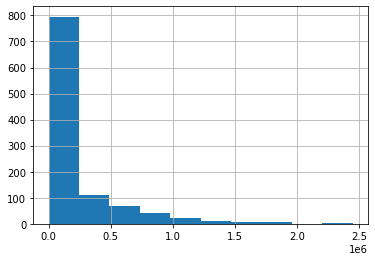

In [129]:
df_clean['votes'].hist()

# Distribution of Ratings

<AxesSubplot:>

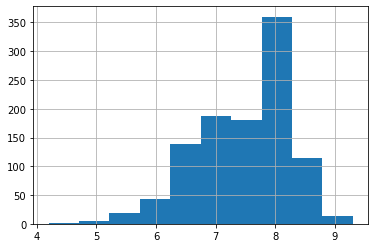

In [130]:
df_clean['rating'].hist()

# Distribution of Run Time

<AxesSubplot:>

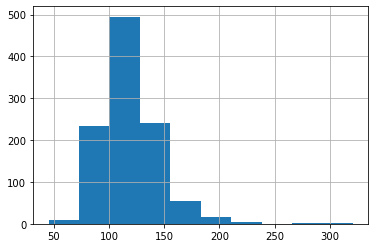

In [131]:
df_clean['run_time_mins'].hist()

# Distribution of Years

<AxesSubplot:>

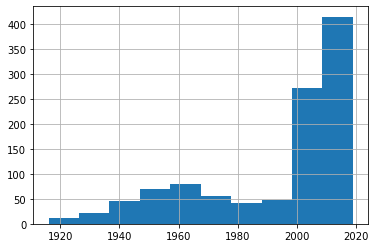

In [132]:
df_clean['year'].hist()

# Which Directors create the highest grossing movies?

In [133]:
director_gross = df_clean.groupby('director')['gross_millions'].mean().sort_values(ascending=False)

<AxesSubplot:xlabel='director'>

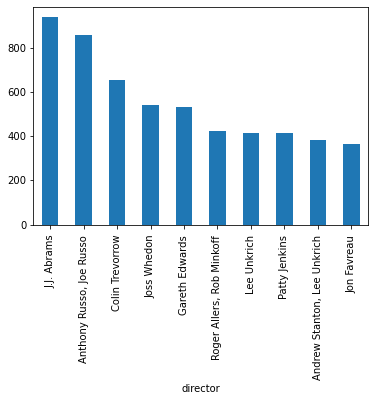

In [134]:
director_gross[:10].plot(kind='bar')

# Which Directors create the lowest grossing movies?

<AxesSubplot:xlabel='director'>

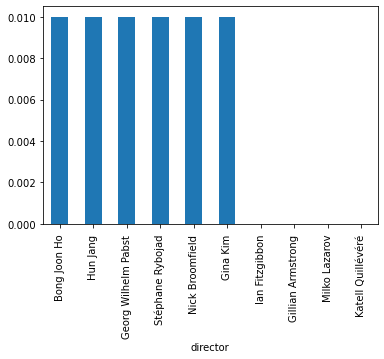

In [135]:
director_gross[-10:].plot(kind='bar')

# Which is the highest Grossing movie?

In [136]:
np.max(df_clean['gross_millions'])

936.66

In [137]:
df_clean[df_clean['gross_millions'] == 936.66]

,Unnamed: 0,id,name,year,run_time_mins,genre,rating,about,director,actors,votes,gross_millions
199,199,203,Star Wars: Episode VII - The Force Awakens,2015,138,"Action, Adventure, Sci-Fi",7.8,"new threat to the galaxy rises, Rey, a desert...",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",882891,936.66


The highest grossing film is `Star Wars: Episode VII - The Force Awakens` which was directed by J.J. Abrams	

# Which is the lowest Grossing movie?

In [138]:
np.min(df_clean['gross_millions'])

0.0

In [139]:
df_clean[df_clean['gross_millions'] == 0.0]

,Unnamed: 0,id,name,year,run_time_mins,genre,rating,about,director,actors,votes,gross_millions
259,265,23,Oro,2017,103,"Adventure, Drama, History",5.7,", ambition, treason and death clash in a never...",Agustín Díaz Yanes,"Raúl Arévalo, Bárbara Lennie, Óscar Jaenada, J...",1623,0.0
324,335,96,Réparer les vivants,2016,103,Drama,6.9,ngle devastating event intertwines inextricabl...,Katell Quillévéré,"Tahar Rahim, Emmanuelle Seigner, Anne Dorval, ...",3128,0.0
328,339,100,Ága,2018,96,Drama,7.3,"he far north, Sedna and Nanook dream of bringi...",Milko Lazarov,"Mikhail Aprosimov, Feodosia Ivanova, Sergei Eg...",1350,0.0
772,871,182,Hyena Road,2015,120,"Action, Drama, War",6.5,"e different men, three different worlds, three...",Paul Gross,"Rossif Sutherland, Allan Hawco, David Richmond...",7455,0.0
819,918,2,Death of a Superhero,2011,97,Drama,7.1,ing 15-year-old boy draws stories of an invinc...,Ian Fitzgibbon,"Thomas Brodie-Sangster, Lilly Forgách, Ian Fit...",3529,0.0
1016,1152,147,Death Defying Acts,2007,97,"Drama, History, Romance",5.8,"tour of Britain in 1926, Harry Houdini (Guy P...",Gillian Armstrong,"Catherine Zeta-Jones, Guy Pearce, Timothy Spal...",9994,0.0


# Which Directors create the highest voted movies?

In [140]:
director_vote = df_clean.groupby('director')['votes'].mean().sort_values(ascending=False)

<AxesSubplot:xlabel='director'>

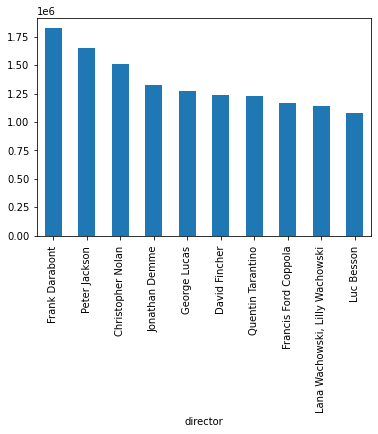

In [141]:
director_vote[:10].plot(kind='bar')

# Which Directors create the lowest voted movies?

<AxesSubplot:xlabel='director'>

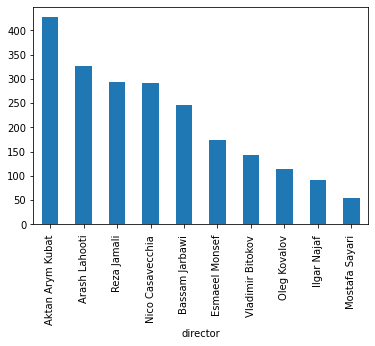

In [142]:
director_vote[-10:].plot(kind='bar')

# Which is the highest voted movie?

In [143]:
np.max(df_clean['votes'])

2451775

In [144]:
df_clean[df_clean['votes'] == 2451775]

,Unnamed: 0,id,name,year,run_time_mins,genre,rating,about,director,actors,votes,gross_millions
0,0,1,The Shawshank Redemption,1994,142,Drama,9.3,"imprisoned men bond over a number of years, fi...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2451775,28.34


The highest grossing film is `The Shawshank Redemption` which was directed by Frank Darabont

# Which is the lowest voted movie?

In [145]:
np.min(df_clean['votes'])

55

In [146]:
df_clean[df_clean['votes'] == 55]

,Unnamed: 0,id,name,year,run_time_mins,genre,rating,about,director,actors,votes,gross_millions
373,387,150,As I Lay Dying,2018,80,Drama,5.6,mily of four persons go to a remote village to...,Mostafa Sayari,"Madjid Aghakarimi, Nader Fallah, Elham Korda, ...",55,16.27


# Which Directors create the highest Rated movies?

In [147]:
director_rates = df_clean.groupby('director')['rating'].mean().sort_values(ascending=False)

<AxesSubplot:xlabel='director'>

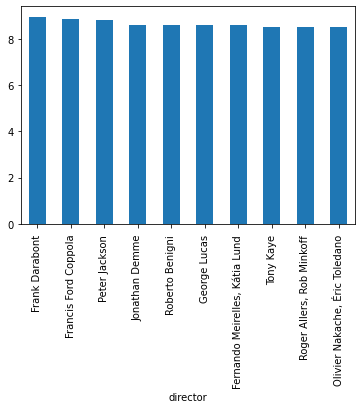

In [148]:
director_rates[:10].plot(kind='bar')

# Which Directors create the lowest Rated movies?

<AxesSubplot:xlabel='director'>

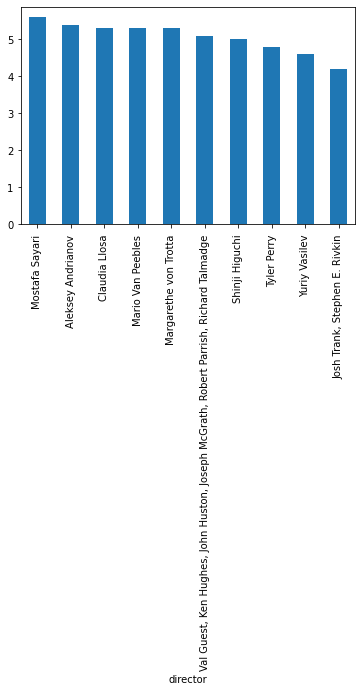

In [149]:
director_rates[-10:].plot(kind='bar')

# Which is the highest Rated movie?

In [150]:
np.max(df_clean['rating'])

9.3

In [151]:
df_clean[df_clean['rating'] == 9.3]

,Unnamed: 0,id,name,year,run_time_mins,genre,rating,about,director,actors,votes,gross_millions
0,0,1,The Shawshank Redemption,1994,142,Drama,9.3,"imprisoned men bond over a number of years, fi...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2451775,28.34


The highest rated film is `The Shawshank Redemption` which was directed by Frank Darabont.

# Which is the lowest Rated movie?

In [152]:
np.min(df_clean['rating'])

4.2

In [153]:
df_clean[df_clean['rating'] == 4.2]

,Unnamed: 0,id,name,year,run_time_mins,genre,rating,about,director,actors,votes,gross_millions
868,973,60,Fantastic Four,2015,100,"Action, Adventure, Sci-Fi",4.2,young outsiders teleport to an alternate and ...,"Josh Trank, Stephen E. Rivkin","Miles Teller, Kate Mara, Michael B. Jordan, Ja...",158154,56.12


# Word-Cloud from about feature

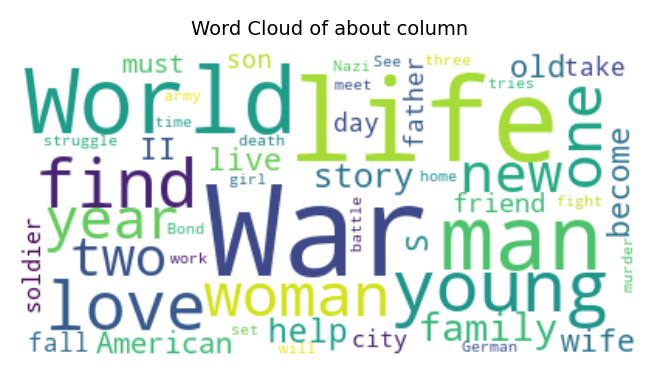

In [154]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = ' '.join([word for review in df_clean['about']
                     for word in review.split()])
wordcloud_about = WordCloud(background_color="white",
                          colormap='viridis', max_words=50,
                          collocations=False).generate(text)
plt.figure(figsize=(4, 4), dpi=200)
plt.title('Word Cloud of about column', fontsize=7)
plt.imshow(wordcloud_about, interpolation='bilinear')
plt.axis("off")
plt.show()

Common words that can be seen are World, War, love, life, find, woman etc.